# 메달 획득 요인 분석 제안서
김혜인 202004036  
이여민 202104289  
서은빈 201804052
  
## 1.개요

###분석 목적: 메달 획득의 요인 분석
120년동안 올림픽 선수들의 데이터 분석을 통해 각 종목에 대한 참가자 수, 성별 분포, 연령 분포, 성적 및 메달 획득 현황 등을 조사할 수 있다.

특히, 한국에서 선호하는 스포츠 종목 중 세 종목인 체조,수영, 스피드 스케이팅에 대해 메달리스트와 우리나라 선수들의 특징을 심층적인 이해를 획득하고자 한다. 이를 통해 어떤 선수들이 주목받고 있는지, 어떤 요인이 성과에 영향을 미치는지를 파악할 수 있다. 더불어 결과 도출 과정에서 메달을 딴 나라의 조건을 분석하여, 메달 취득 요인 분석을 진행하고자 한다.

또한, 이 데이터를 통해 각 종목의 인기와 성과를 비교하고 이를 통해 한국의 스포츠 문화와 그 발전 방향에 대한 통찰력을 얻을 수 있다.


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [24]:
df = pd.read_csv("/content/athlete_events.csv")

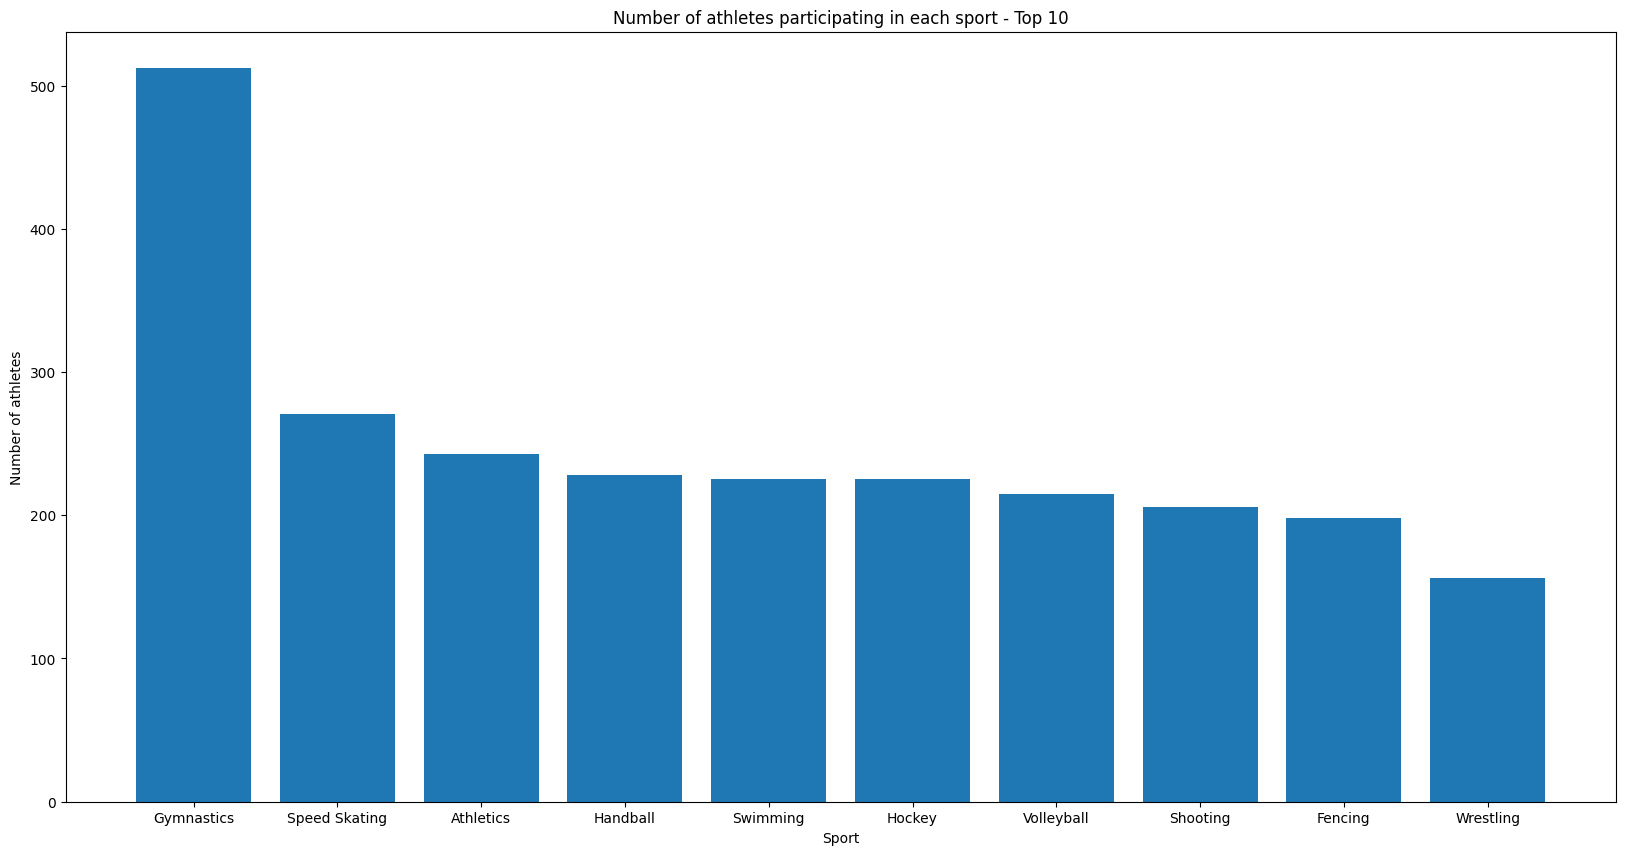

In [26]:
# 한국 종목별 선수 수 - 내림차순
korea_df = df[df['NOC'] == 'KOR']
korea_medallist_df = korea_df.dropna(subset=['Medal'])
korea_sport_value_count_df = korea_df['Sport'].value_counts()
korea_sport_value_count_df = korea_sport_value_count_df[:10]
korea_sport_of_medalist_value_count_df = korea_medallist_df['Sport'].value_counts()
korea_sport_of_medalist_value_count_df = korea_sport_of_medalist_value_count_df[:10]


label = korea_sport_value_count_df.index
data = korea_sport_value_count_df.values
index = np.arange(len(label))

plt.figure(figsize= (20, 10))
plt.title("Number of athletes participating in each sport - Top 10")
plt.bar(index, data)
plt.xlabel('Sport')
plt.ylabel('Number of athletes')
plt.xticks(index, label)
plt.show()

##2.데이터 수집
120년 올림픽 기록  
출처:https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data

  
수집된 데이터의 구조 및 특성 설명 :

*  ID - 선수별 고유번호

* 이름 - 선수의 이름

* 성별 - M 또는 F

* 연령 - 정수

* 높이 - 센티미터 단위

* 무게 - 킬로그램 단위

* 팀 - 팀 이름

* NOC - 국가 올림픽 위원회(National Olympic Committee) 3자리 코드

* 게임 - 연도 및 시즌

* 연도 - 정수

* 시즌 - 여름 또는 겨울

* 도시 - 개최 도시

* 스포츠 - 스포츠

* 이벤트 - 이벤트

* 메달 - 금, 은, 동, NA(메달을 얻지 못함)

##3.데이터 전처리  
데이터의 기본 정보 확인  
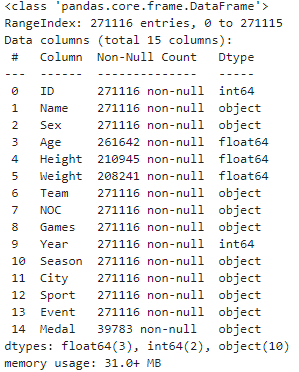  결측치 확인
    : Age, Height, Weight, Medal 컬럼 확인    
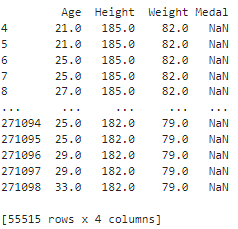  df.info()

In [ ]:
#1. 수영선수 비교

Swimming_medalists = df2[
    (df2['Sport'] == 'Swimming') & #종목은 수영
    (df2['Medal'].isin(['Gold', 'Silver', 'Bronze'])) & #메달리스트만 뽑기
    (df2['Sex'] == 'M') #성별은 남자
]

#data2 = Swimming_medalists[['Height', 'Weight','Sex','Team','Name']].dropna()

Swimming_ko = df2[
    (df2['Sport'] == 'Swimming_ko') &  #종목은 수영
    (df2['Sex'] == 'M')  # 남성 선수 필터링
    & (df2['Team'] == 'South Korea') # 한국 수영 선수
]
#data4 =Skating_ko[['Height', 'Weight','Sex','Team']].dropna()

import matplotlib.pyplot as plt

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))

# Speed Skating Medalists (파란색)
plt.scatter(Swimming_medalists['Height'], Swimming_medalists['Weight'], alpha=0.5, color='blue', label='Medalists')

# Additional Skaters (빨간색)
plt.scatter(Swimming_ko['Height'], Swimming_ko['Weight'], alpha=0.5, color='red', label='Korean Skaters')

# 그래프 제목, 축 레이블 설정
plt.title('Height vs. Weight of Swimming Participants')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()


이상치처리

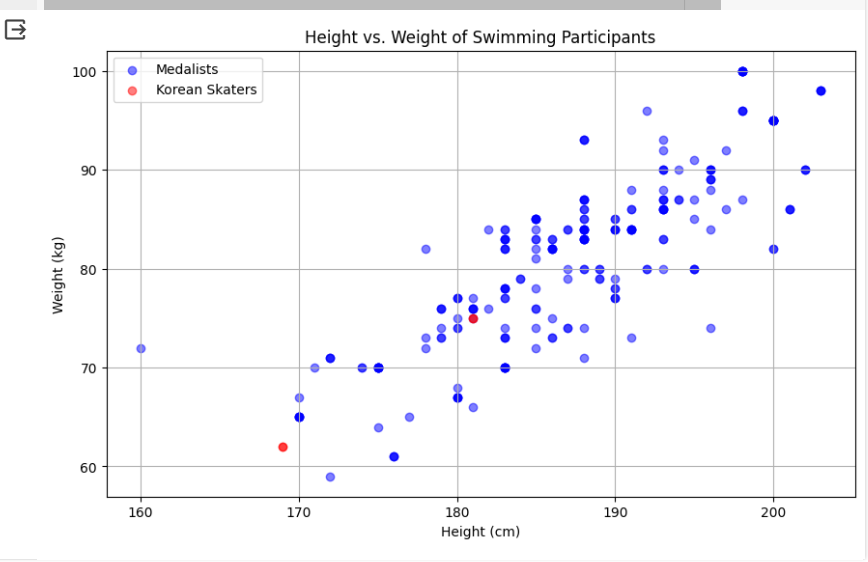  수영 남자 선수 기준


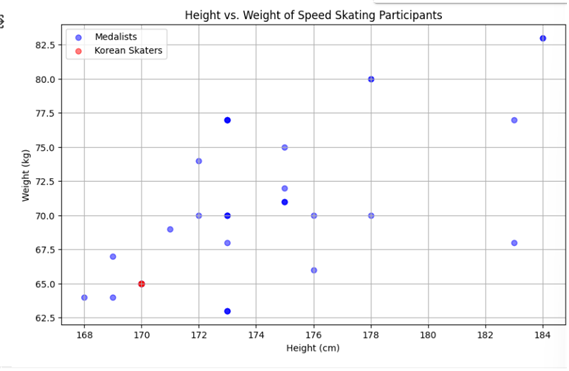  쇼트트랙 남자 선수 기준

In [ ]:
#2. 쇼트트랙 선수 비교

Skating_medalists = df2[
    (df2['Sport'] == 'Short Track Speed Skating') & #종목은 쇼트트랙
    (df2['Medal'].isin(['Gold', 'Silver', 'Bronze'])) & #메달리스트만 뽑기
    (df2['Sex'] == 'M') #성별은 남자로 구분하기
]

#data1 = Skating_medalists[['Height', 'Weight','Sex','Team','Name']].dropna()

Skating_ko = df2[
    (df2['Sport'] == 'Short Track Speed Skating') &  #종목은 쇼트트랙
    (df2['Sex'] == 'M')  # 남성 선수 필터링
    & (df2['Team'] == 'South Korea') #팀은 한국
]
#data3 =Skating_ko[['Height', 'Weight','Sex','Team']].dropna()
import matplotlib.pyplot as plt

# 산점도 그래프 그리기
plt.figure(figsize=(10, 6))

# Speed Skating Medalists (파란색)
plt.scatter(Skating_medalists['Height'], Skating_medalists['Weight'], alpha=0.5, color='blue', label='Medalists')

# Additional Skaters (빨간색)
plt.scatter(Skating_ko['Height'], Skating_ko['Weight'], alpha=0.5, color='red', label='Korean Skaters')

# 그래프 제목, 축 레이블 설정
plt.title('Height vs. Weight of Swimming Participants')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)

# 범례 추가
plt.legend()

# 그래프 표시
plt.show()



In [ ]:
# 전체, 한국인 선수의 종목별 세 항목 비교
korean_players = df[df['NOC'] == 'KOR']

all_players = df

# 한국 선수만의 종목별 세 항목 평균 계산
korean_mean = korean_players.groupby('Sport').mean(numeric_only=True)[['Weight', 'Height', 'Age']]

# 전체 선수의 종목별 세 항목 평균 계산
all_players_mean = all_players.groupby('Sport').mean(numeric_only=True)[['Weight', 'Height', 'Age']]

sports_list = ['Speed Skating', 'Swimming', 'Gymnastics']

for sport in sports_list:
    fig, ax = plt.subplots(figsize=(10, 6))

    # 전체 선수 평균값 표시
    ax.plot(all_players_mean.loc[sport], marker='o', linestyle='-', color='g', label='All Players Mean')

    # 한국 선수 평균값 표시
    ax.bar(korean_mean.loc[sport].index, korean_mean.loc[sport], color='r', alpha=0.7, label='Korean Players Mean')

    # 평균값 표시
    for i, val in enumerate(all_players_mean.loc[sport]):
        ax.text(i, val, f'{val:.2f}', va='bottom', ha='center', fontsize=10, color='g')
    for i, val in enumerate(korean_mean.loc[sport]):
        ax.text(i - 0.2, val, f'{val:.2f}', va='bottom', ha='center', fontsize=10, color='r')

    # 라벨 및 타이틀 추가
    ax.set_title(f'{sport}')

    # 범례 추가
    ax.legend()

    # x축 라벨 회전
    plt.xticks(rotation=45)

    plt.show()


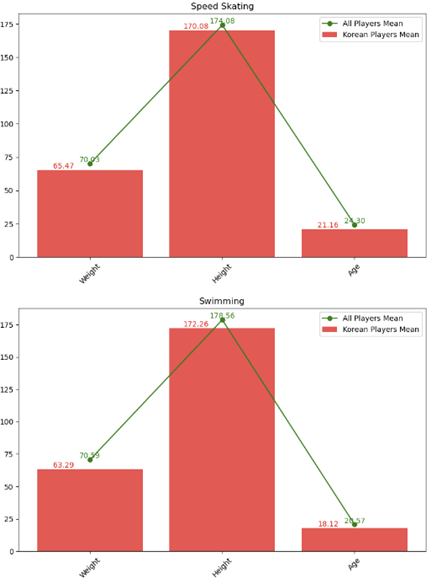

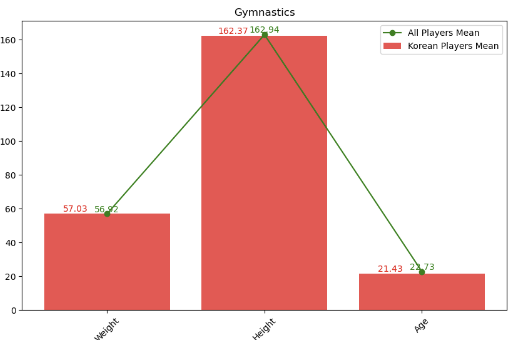

##4.데이터 및 시각화

- ### 상관계수 분석  
결론:   
신장과 체중은 비례한다. 이외의 유의미한 수치는 얻지 못하였다.
- ### 종목별(체조, 스피드 스케이팅, 수영) 메달 개수 최상위 3개국
- ### 종목별 최상위 3개국 메달리스트 선수들과 한국 선수들 비교
메달 개수 최상위 3개국 선수들: 메달리스트 데이터  
한국 선수: 전체  
신장, 체중, 나이 비교 - box plot


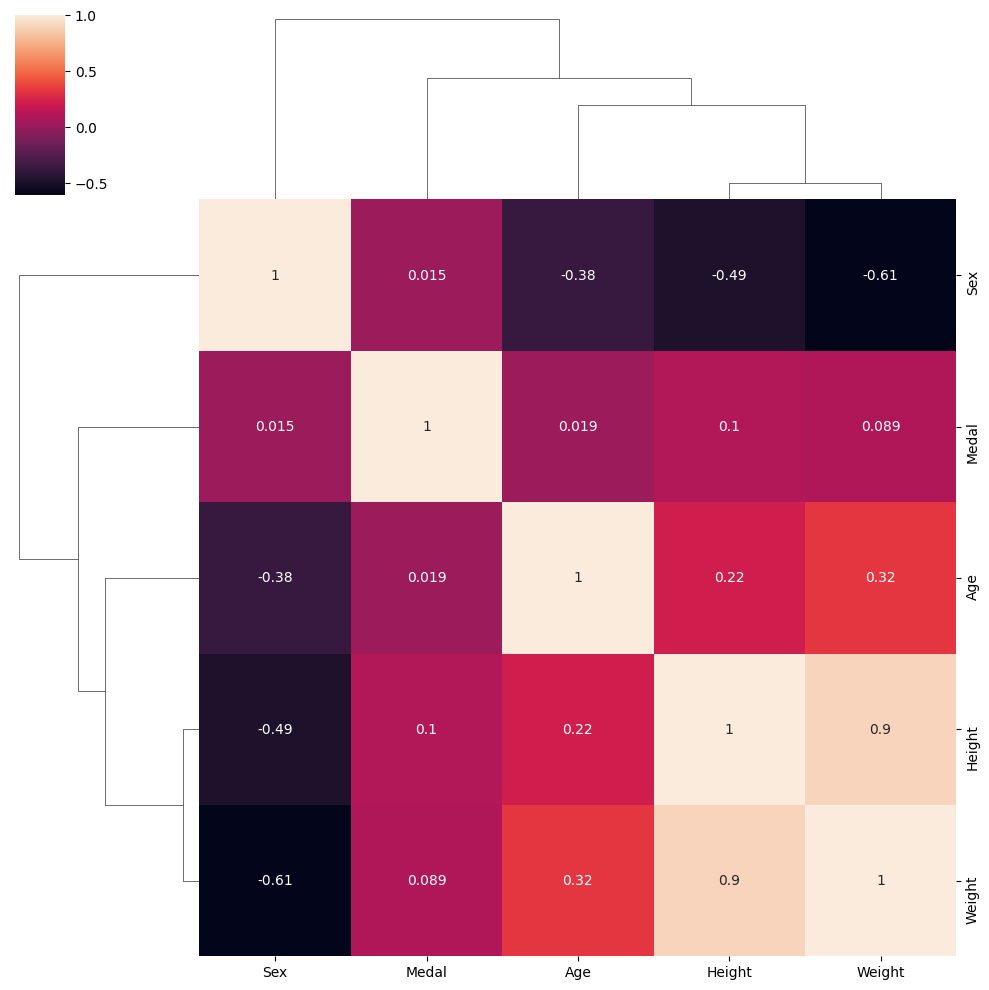

In [ ]:
# df = df[df['Sport'].isin(['Gymnastics', 'Speed Skating', 'Swimming'])]

# 옛날 자료의 경우 height, weight가 null인 값들이 있어 결측치를 제거하고 시각화 진행
corr_df = df.dropna(subset=['Height'])

# 성별(Sex) 칼럼 값을 조건에 따라 변경 - Bool -> Int
corr_df.loc[corr_df['Sex'] == 'M', 'Sex'] = 0
corr_df.loc[corr_df['Sex'] == 'F', 'Sex'] = 1

# 메달(Medal) 칼럼 값을 조건에 따라 변경 gold, silver bronze, NaN -> 3, 2, 1, 0
corr_df.loc[corr_df['Medal'] == 'Gold', 'Medal'] = 3
corr_df.loc[corr_df['Medal'] == 'Silver', 'Medal'] = 2
corr_df.loc[corr_df['Medal'] == 'Bronze', 'Medal'] = 1
corr_df.loc[corr_df['Medal'].isna(), 'Medal'] = 0

corr = corr_df[['Sex', 'Age', 'Height', 'Weight', 'Medal']].corr()

sns.clustermap(corr,
               annot = True)

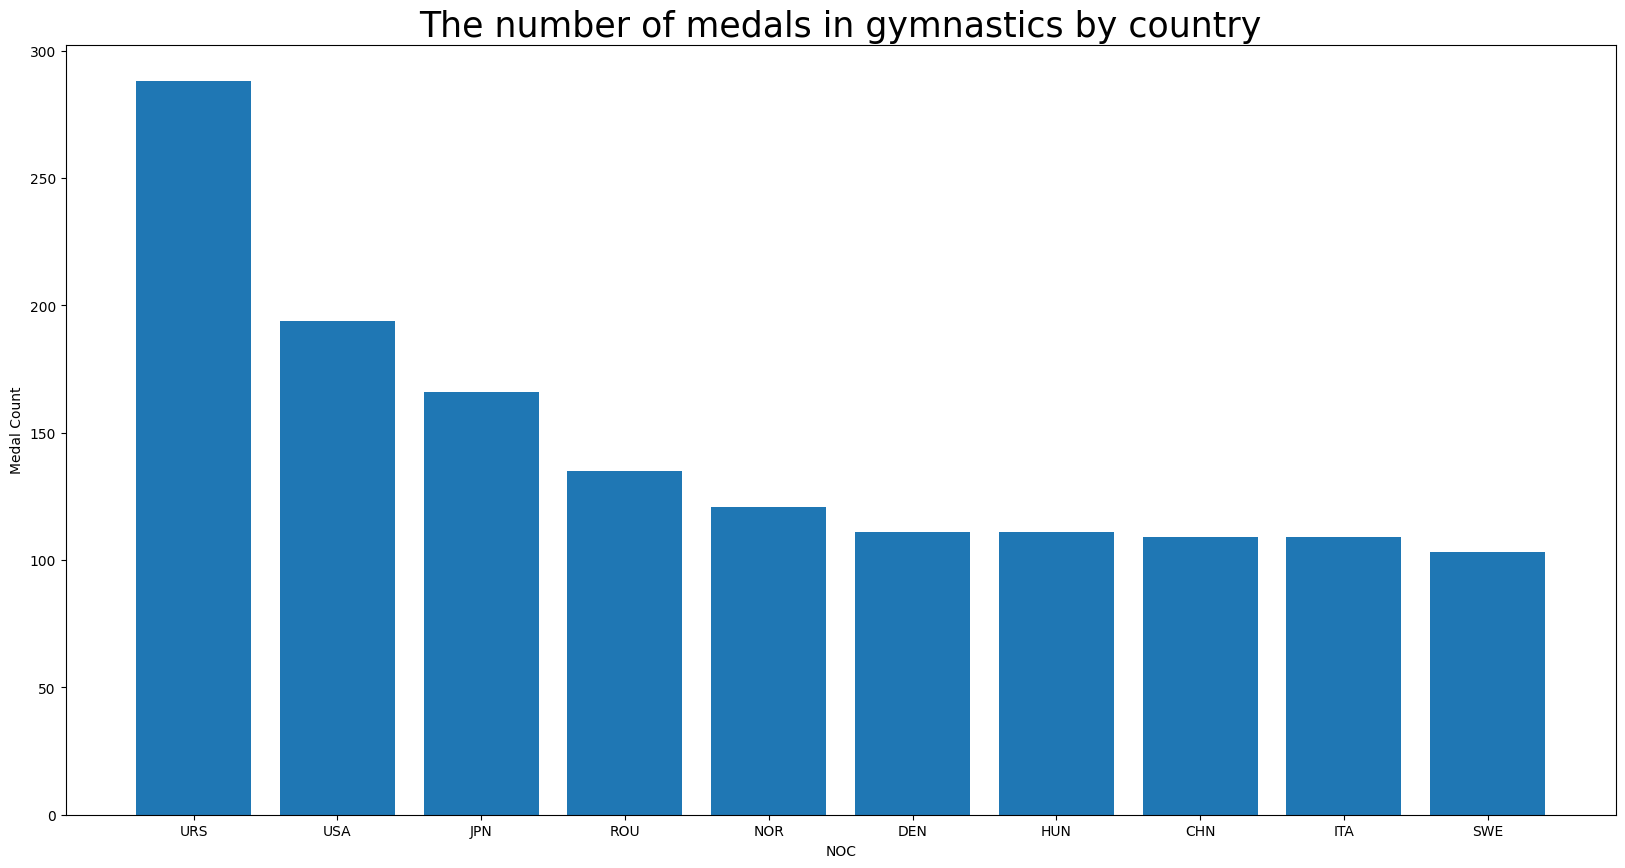

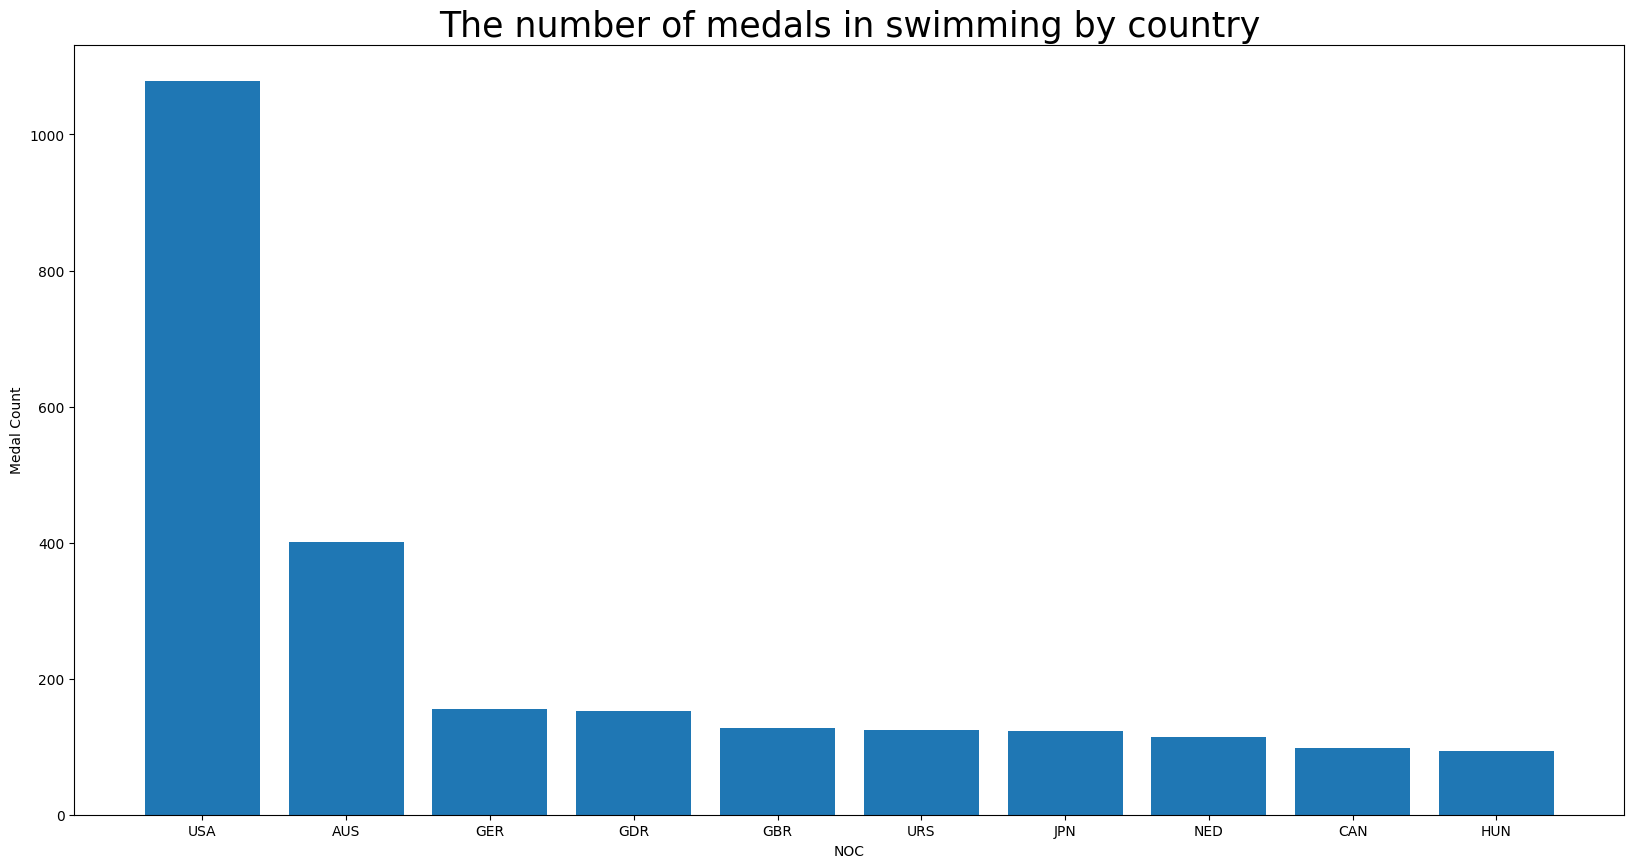

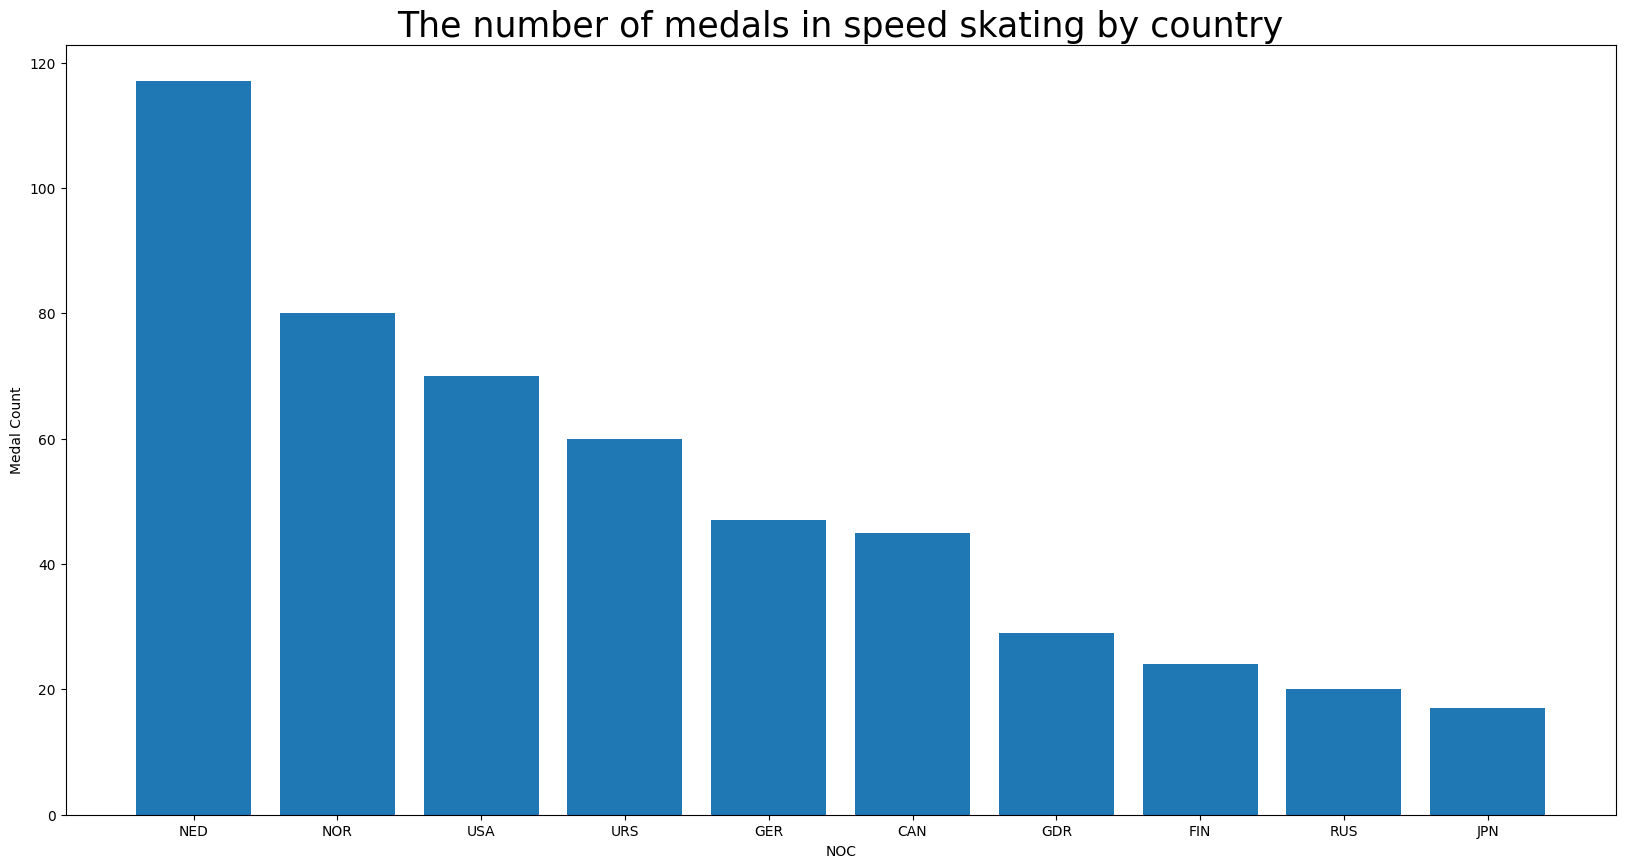

In [27]:
# 국가별 메달 수 시각화 - 체조, 수영, 스피드 스케이팅

# 체조
plt.figure(figsize= (20, 10))
plt.title("noc")
medal_noc_df = df.dropna(subset=['Medal'])
gymnastics_df = medal_noc_df[medal_noc_df['Sport'] == 'Gymnastics']
gymnastics_count = gymnastics_df['NOC'].value_counts()[:10]

label = gymnastics_count.index
data = gymnastics_count.values
index = np.arange(len(label))

plt.title("The number of medals in gymnastics by country", fontdict={'fontsize': 25})
plt.bar(index, data)
plt.xlabel('NOC')
plt.ylabel('Medal Count')
plt.xticks(index, label)
plt.show()


# 수영
plt.figure(figsize= (20, 10))
plt.title("noc")
swimming_df = medal_noc_df[medal_noc_df['Sport'] == 'Swimming']
swimming_count = swimming_df['NOC'].value_counts()[:10]

label = swimming_count.index
data = swimming_count.values
index = np.arange(len(label))

plt.title("The number of medals in swimming by country", fontdict={'fontsize': 25})
plt.bar(index, data)
plt.xlabel('NOC')
plt.ylabel('Medal Count')
plt.xticks(index, label)
plt.show()

# 스피드 스케이팅
plt.figure(figsize= (20, 10))
speed_skating_df = medal_noc_df[medal_noc_df['Sport'] == 'Speed Skating']
speed_skating_count = speed_skating_df['NOC'].value_counts()[:10]

label = speed_skating_count.index
data = speed_skating_count.values
index = np.arange(len(label))

plt.title("The number of medals in speed skating by country", fontdict={'fontsize': 25})
plt.bar(index, data)
plt.xlabel('NOC')
plt.ylabel('Medal Count')
plt.xticks(index, label)
plt.show()

# 변수 별 4개국 비교 분석
## 신장
**체조:** 다른 국가 선수들과 크게 차이나지 않는다.  
**수영:** 박스(1~3 사분위수)가 다른 국가들에 비해 낮게 위치한다.  
**스피드 스케이팅:** 미국 선수들과 중위값은 비슷하나, 1사분위수는 낮다. 노르웨이와 네덜란드 선수들과는 수치가 많이 차이 난다.   

## 체중
**체조:** 중위값은 대체로 비슷하나 미국이 유독 중위값이 낮게 나타난다. 전체적으로 1사분위수는 네 국가가 큰 패턴 없이 분포해있다.  
**수영:** 다른 국가들의 데이터는 대체로 비슷하게 분포되어있으나 한국 데이터는 조금 낮게 나타난다. 하지만 다른 종목에 비해서는 오히려 차이가 적은 편에 속한다.  
**스피드 스케이팅:** 값이 낮게 분포되어있다. 대체로 신장과 체중은 비례하기 때문에 신장 박스 플롯와 양상이 유사하다. 실제로 상관계수도 0.9로 높게 나타났다.


## 나이
세 종목 모두 한국 선수들의 나이가 대체로 어린 편에 속한다.

## 결론
종목마다 분포의 차이가 있지만 대체로 한국 선수들의 신장과 체중이 낮게 분포되어있는 것을 확인하였다.


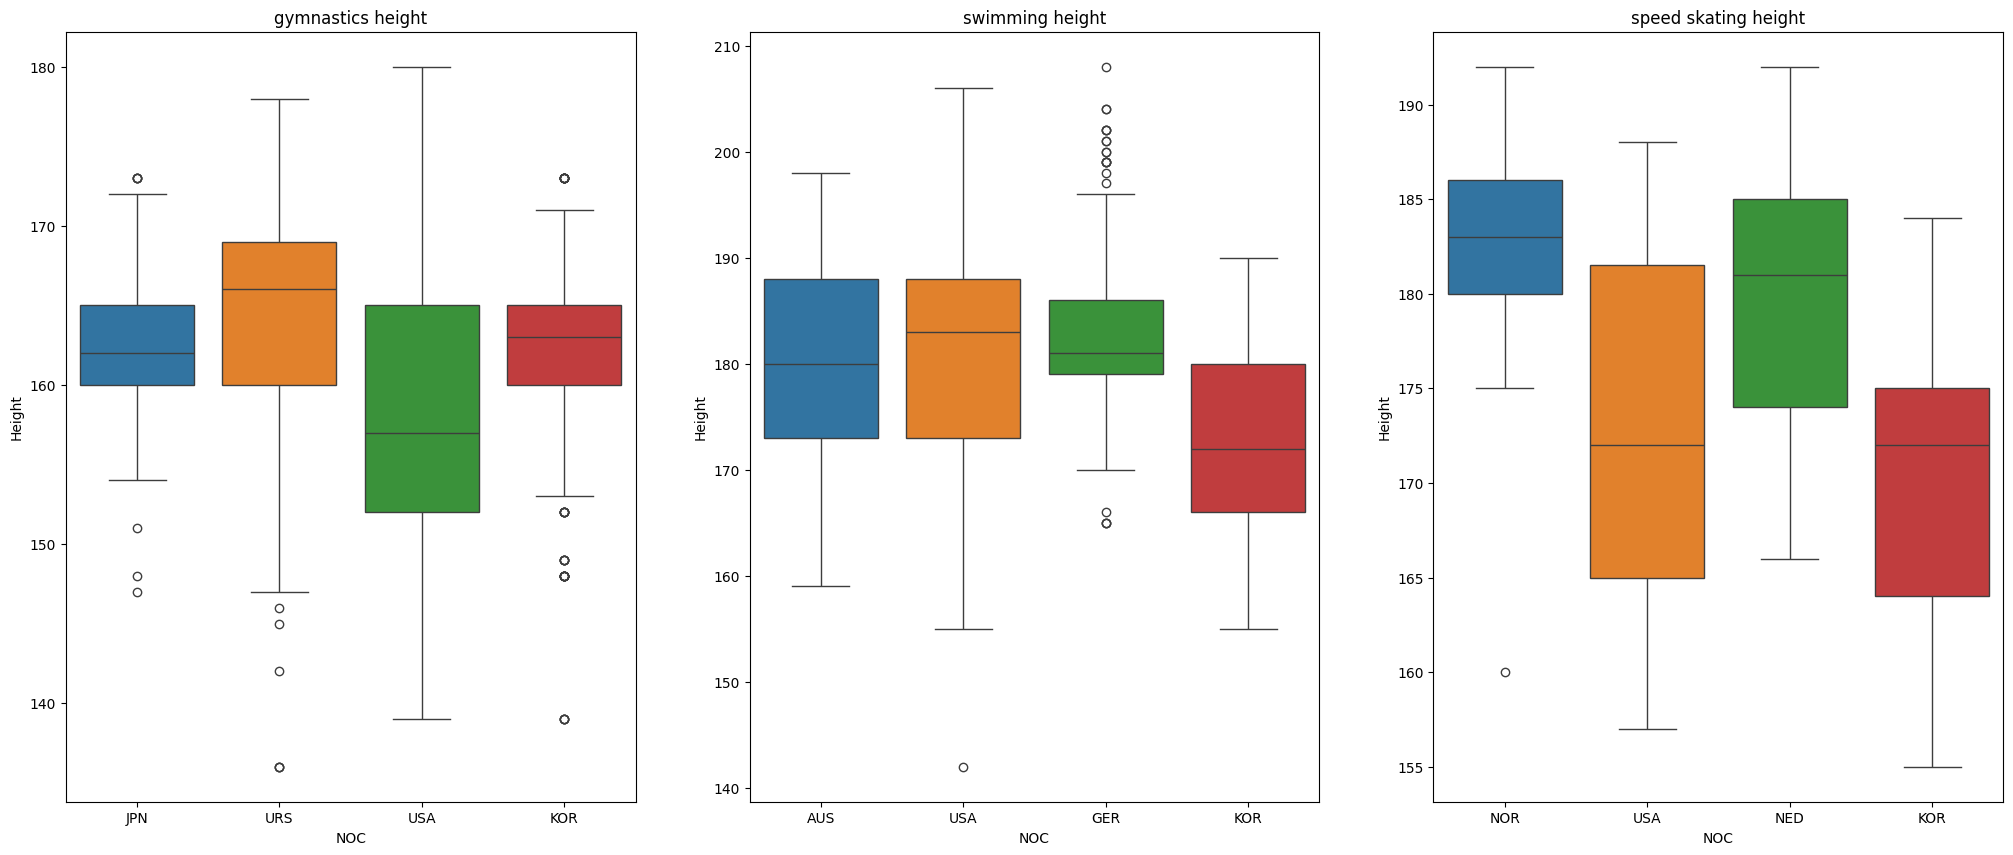

In [38]:
fig, ax = plt.subplots(ncols=3, figsize=(25, 10))
korean_athletes_df = df[df['NOC'] == 'KOR'] #한국인 데이터 - 노메달 포함

gymnastics_boxplot_df = gymnastics_df[gymnastics_df["NOC"].isin(['URS', 'USA', 'JPN'])]
gymnastics_boxplot_df = pd.concat([gymnastics_boxplot_df, korean_athletes_df[korean_athletes_df['Sport'] == 'Gymnastics']], ignore_index=True)
sns.boxplot(x='NOC', y='Height', orient='v', data=gymnastics_boxplot_df, ax=ax[0], palette=palette)

swimming_boxplot_df = swimming_df[swimming_df["NOC"].isin(['USA', 'AUS', 'GER'])]
swimming_boxplot_df = pd.concat([swimming_boxplot_df, korean_athletes_df[korean_athletes_df['Sport'] == 'Swimming']], ignore_index=True)
sns.boxplot(x='NOC', y='Height', orient='v', data=swimming_boxplot_df, ax=ax[1], palette=palette)

speed_skating_boxplot_df = speed_skating_df[speed_skating_df["NOC"].isin(['NED', 'NOR', 'USA'])]
speed_skating_boxplot_df = pd.concat([speed_skating_boxplot_df, korean_athletes_df[korean_athletes_df['Sport'] == 'Speed Skating']], ignore_index=True)
sns.boxplot(x='NOC', y='Height', orient='v', data=speed_skating_boxplot_df, ax=ax[2], palette=palette)

ax[0].set_title("gymnastics height")
ax[1].set_title("swimming height")
ax[2].set_title("speed skating height")

plt.show()

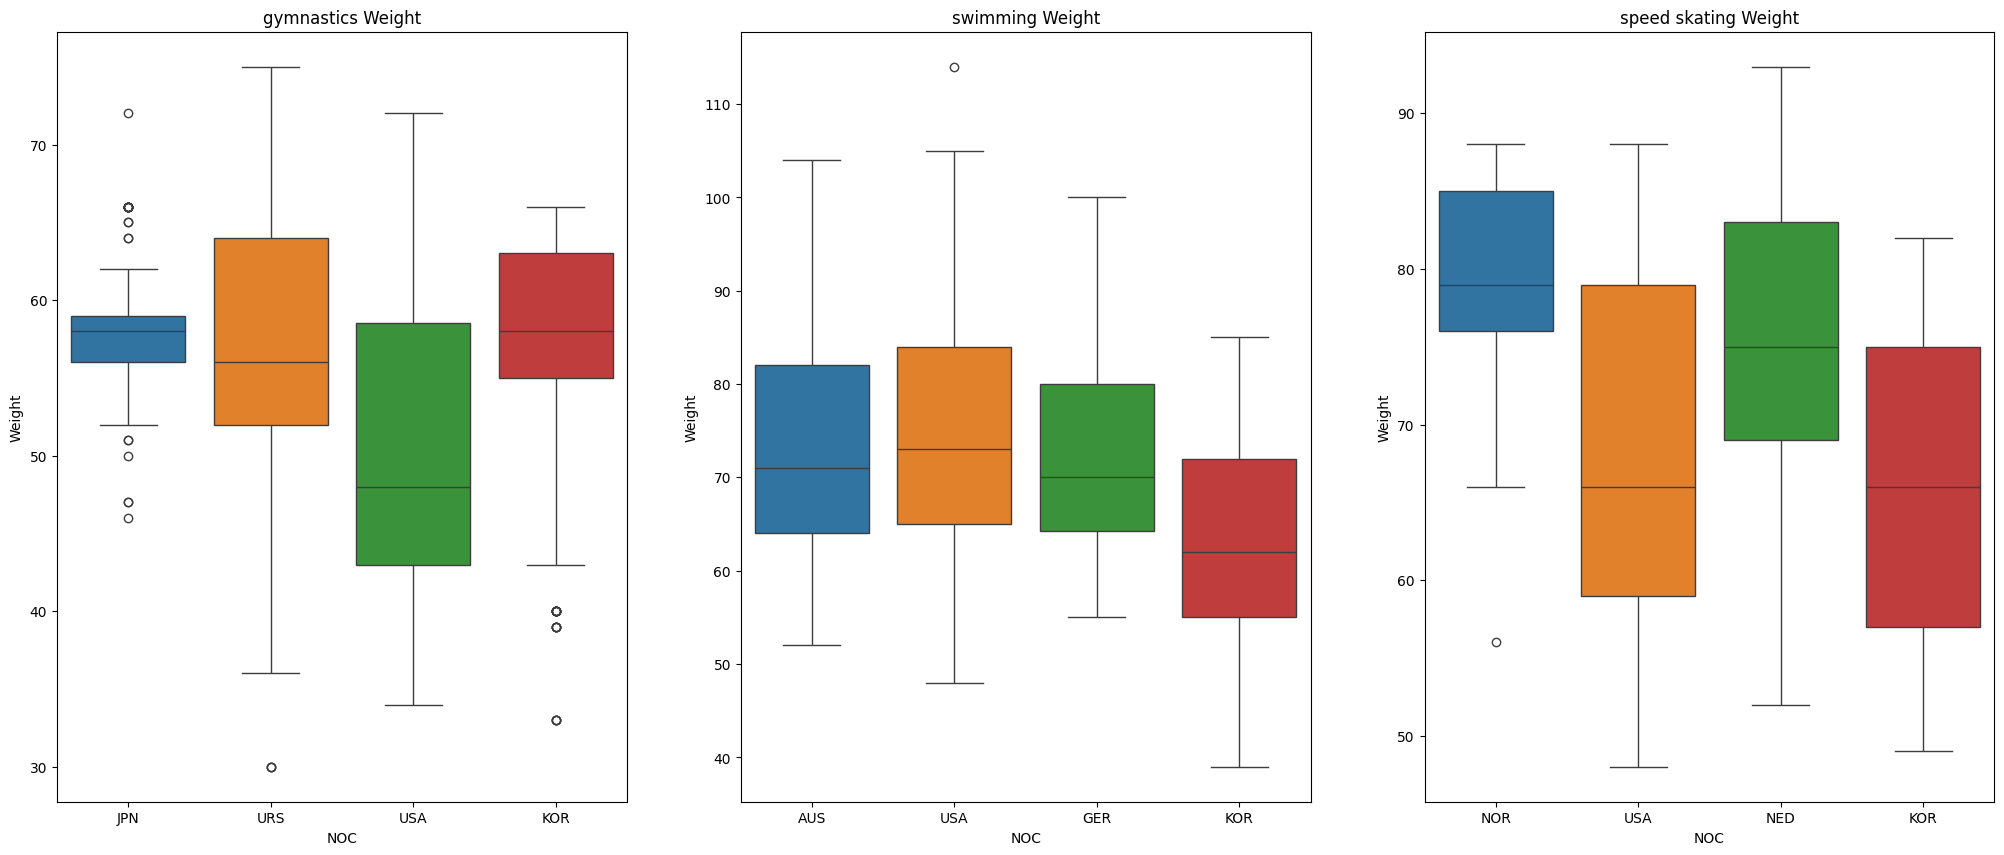

In [39]:
fig, ax = plt.subplots(ncols=3, figsize=(25, 10))
korean_athletes_df = df[df['NOC'] == 'KOR'] #한국인 데이터 - 노메달 포함

gymnastics_boxplot_df = gymnastics_df[gymnastics_df["NOC"].isin(['URS', 'USA', 'JPN'])]
gymnastics_boxplot_df = pd.concat([gymnastics_boxplot_df, korean_athletes_df[korean_athletes_df['Sport'] == 'Gymnastics']], ignore_index=True)
sns.boxplot(x='NOC', y='Weight', orient='v', data=gymnastics_boxplot_df, ax=ax[0], palette=palette)

swimming_boxplot_df = swimming_df[swimming_df["NOC"].isin(['USA', 'AUS', 'GER'])]
swimming_boxplot_df = pd.concat([swimming_boxplot_df, korean_athletes_df[korean_athletes_df['Sport'] == 'Swimming']], ignore_index=True)
sns.boxplot(x='NOC', y='Weight', orient='v', data=swimming_boxplot_df, ax=ax[1], palette=palette)

speed_skating_boxplot_df = speed_skating_df[speed_skating_df["NOC"].isin(['NED', 'NOR', 'USA'])]
speed_skating_boxplot_df = pd.concat([speed_skating_boxplot_df, korean_athletes_df[korean_athletes_df['Sport'] == 'Speed Skating']], ignore_index=True)
sns.boxplot(x='NOC', y='Weight', orient='v', data=speed_skating_boxplot_df, ax=ax[2], palette=palette)

ax[0].set_title("gymnastics Weight")
ax[1].set_title("swimming Weight")
ax[2].set_title("speed skating Weight")

plt.show()

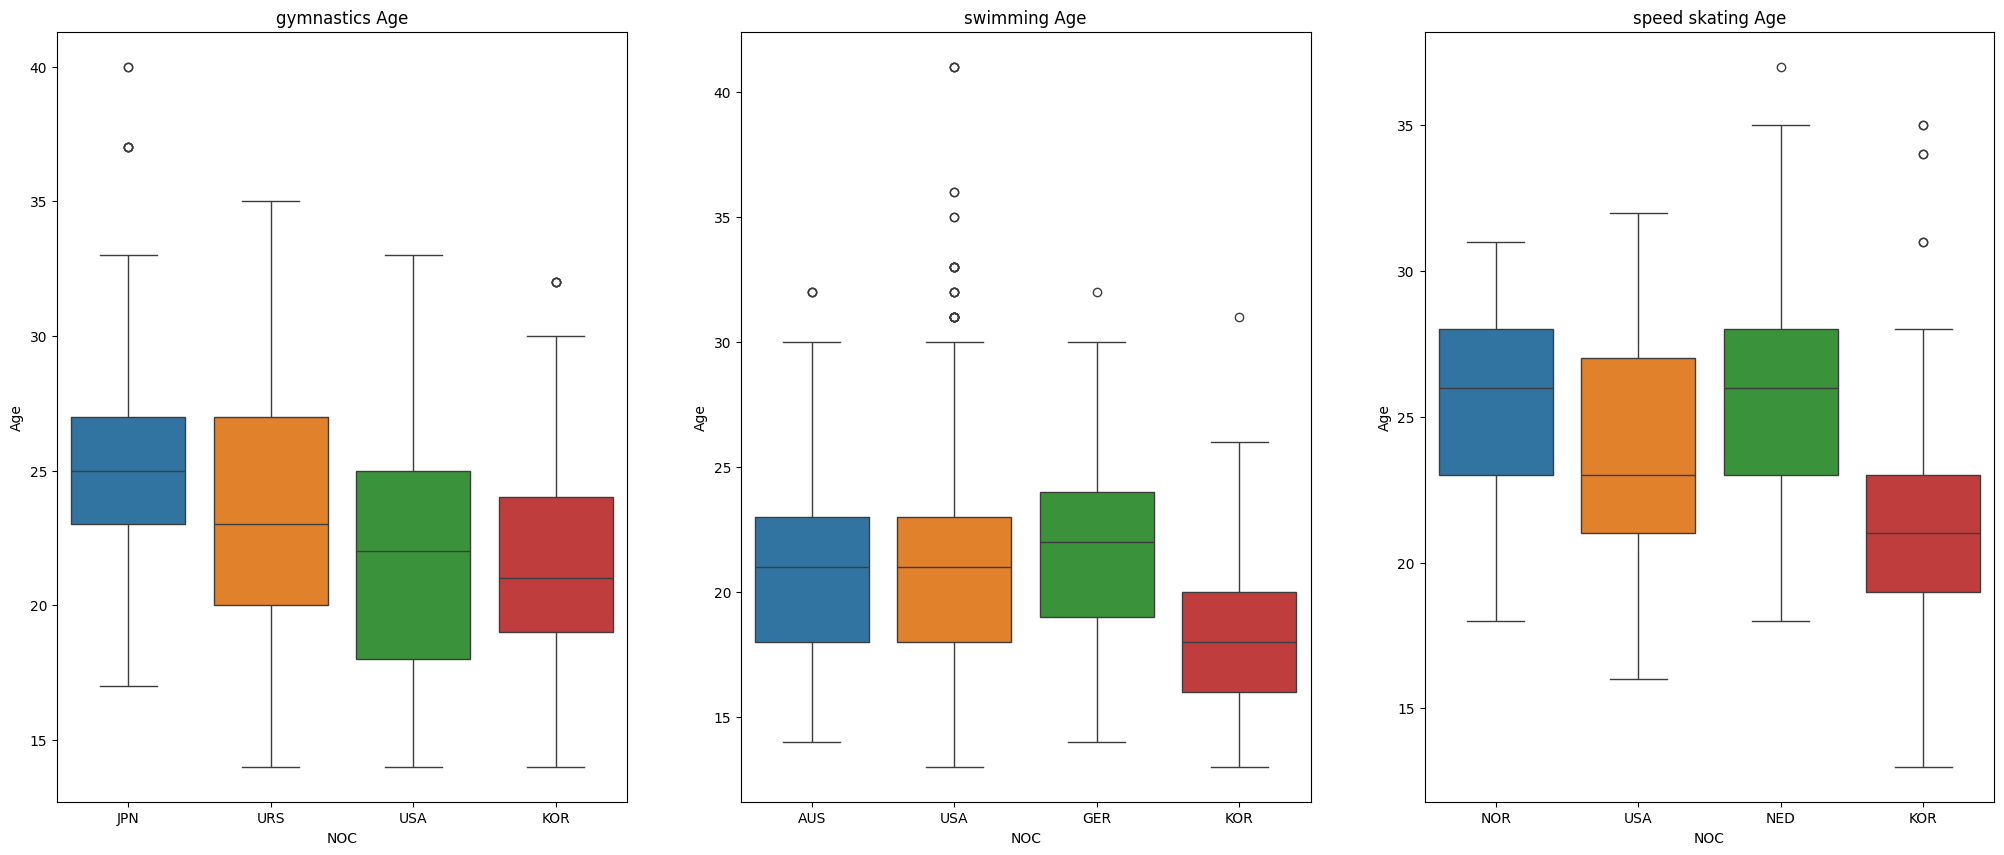

In [40]:
fig, ax = plt.subplots(ncols=3, figsize=(25, 10))
korean_athletes_df = df[df['NOC'] == 'KOR'] #한국인 데이터 - 노메달 포함

gymnastics_boxplot_df = gymnastics_df[gymnastics_df["NOC"].isin(['URS', 'USA', 'JPN'])]
gymnastics_boxplot_df = pd.concat([gymnastics_boxplot_df, korean_athletes_df[korean_athletes_df['Sport'] == 'Gymnastics']], ignore_index=True)
sns.boxplot(x='NOC', y='Age', orient='v', data=gymnastics_boxplot_df, ax=ax[0], palette=palette)

swimming_boxplot_df = swimming_df[swimming_df["NOC"].isin(['USA', 'AUS', 'GER'])]
swimming_boxplot_df = pd.concat([swimming_boxplot_df, korean_athletes_df[korean_athletes_df['Sport'] == 'Swimming']], ignore_index=True)
sns.boxplot(x='NOC', y='Age', orient='v', data=swimming_boxplot_df, ax=ax[1], palette=palette)

speed_skating_boxplot_df = speed_skating_df[speed_skating_df["NOC"].isin(['NED', 'NOR', 'USA'])]
speed_skating_boxplot_df = pd.concat([speed_skating_boxplot_df, korean_athletes_df[korean_athletes_df['Sport'] == 'Speed Skating']], ignore_index=True)
sns.boxplot(x='NOC', y='Age', orient='v', data=speed_skating_boxplot_df, ax=ax[2], palette=palette)

ax[0].set_title("gymnastics Age")
ax[1].set_title("swimming Age")
ax[2].set_title("speed skating Age")

plt.show()